Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise [our work from yesterday](https://tinyurl.com/yb9cz6n5).

# Part 3: Logistic Regression

# I. Wrangle Data

In [14]:
def wrangle(filepath):
    df = pd.read_csv(filepath, index_col='PassengerId')
    df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
    return df

df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')
print(df.shape)
display(df.head())
print(X_test.shape)
display(X_test.head())


(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


## II. Split Data

In [15]:
# split TV from our FM
target = 'Survived'
y = df[target]
X = df.drop(columns=target)

Since there's no time series component, we should do a randomized train-validation split.

In [18]:
# split our data into a TRAINING set and a VALIDATION set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# sanity check
assert len(X_val) + len(X_train) == len(X)

## III. Establish our baseline

- This is a **classification problem**, so we look at the **majority class** to calculate baseline **accuracy score**.

In [28]:
# y_train.head()
# y_train.unique()
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

Text(0, 0.5, 'Survived?')

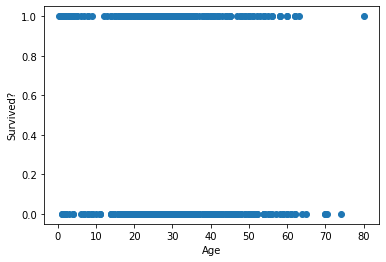

In [29]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived?')

What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [33]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    LogisticRegression()
)
model.fit(X_train, y_train)

/Users/jeffkang/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex', 'Embarked'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

## V. Check Metrics

In [34]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.8019662921348315
Validation Accuracy: 0.7988826815642458


In [35]:
model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [38]:
model.predict_proba(X_test)[:10]
# probability of which class it belongs to, either 1 or 0, surrvived or not

array([[0.87999   , 0.12001   ],
       [0.56540247, 0.43459753],
       [0.87052925, 0.12947075],
       [0.88672393, 0.11327607],
       [0.41529729, 0.58470271],
       [0.84295138, 0.15704862],
       [0.30957879, 0.69042121],
       [0.81892224, 0.18107776],
       [0.21599626, 0.78400374],
       [0.91748402, 0.08251598]])

In [39]:
model.predict_proba(X_test)[:10, -1]

array([0.12001   , 0.43459753, 0.12947075, 0.11327607, 0.58470271,
       0.15704862, 0.69042121, 0.18107776, 0.78400374, 0.08251598])